In [1]:
import torch
import matplotlib.pyplot as plt

from myAE import Manager

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calc_loss(model, x, y, F, device):
    z = model.get_submodule("encoder")(x)
    pred = model.get_submodule("decoder")(z)
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    return ll

manager = Manager()
manager.prepare_data()
manager.set_default_model(2, 2)

hist = manager.train(calc_loss, epochs=30)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Now, it is working on cuda:1.


100%|██████████| 30/30 [02:29<00:00,  4.97s/it]


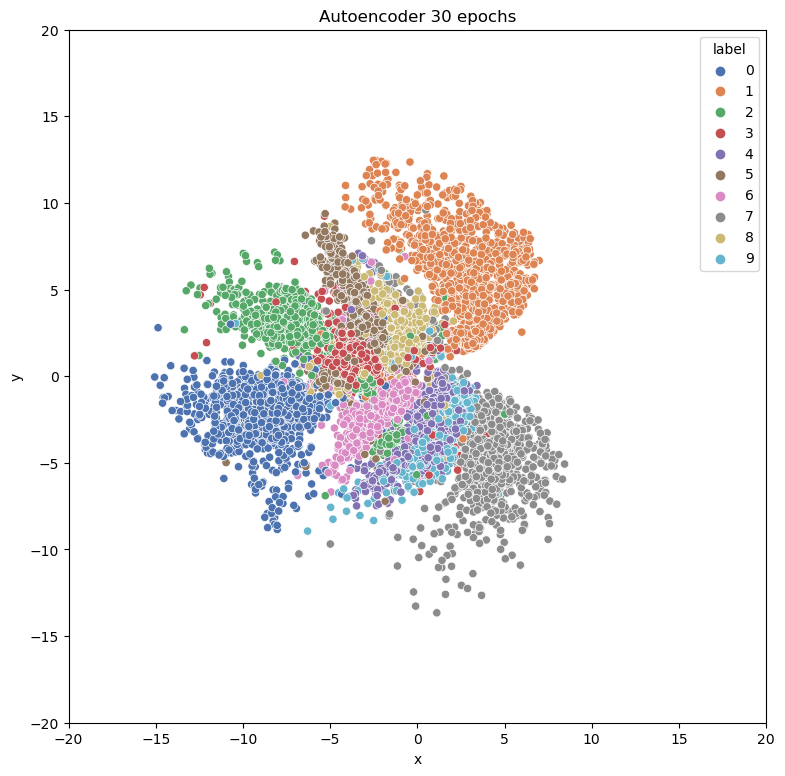

In [7]:
def encode(model, x, y):
    z = model.get_submodule("encoder")(x)
    return [z]

manager.show_latent_space('Autoencoder 30 epochs', encode, xlim=[-20, 20], ylim=[-20, 20], rect_linewidth=0)

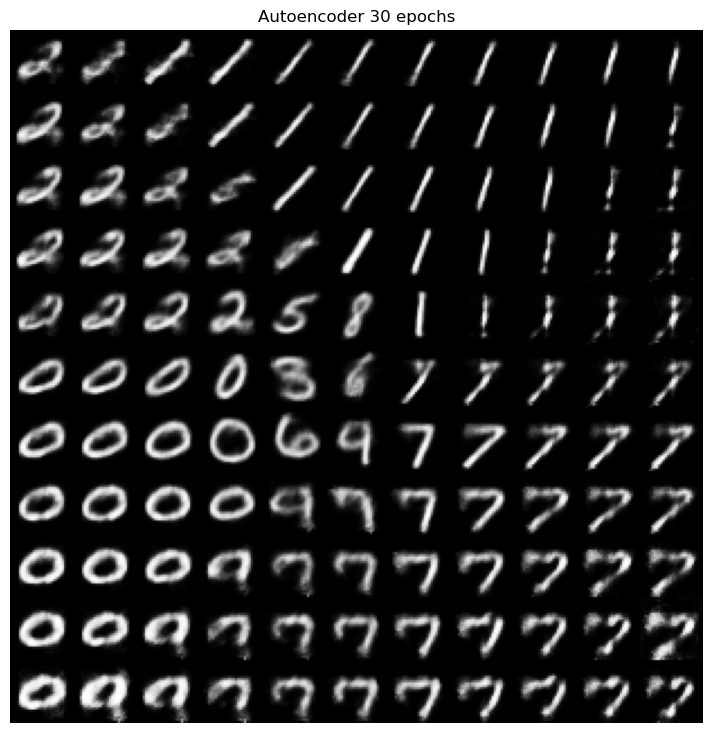

In [9]:
manager.plot_generated_images('Autoencoder 30 epochs', xlim=[-20, 20], ylim=[-20, 20])